In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.metrics import structural_similarity as ssim
from math import log10

# Read imgs
fruits = io.imread("fruits.png")
peppers = io.imread("peppers.tiff")

# Read LUTs
LUT0 = pd.read_excel("Approximate Multiplier LUTs/SCDM8_41_LUT.xlsx")
LUT1 = pd.read_excel("Approximate Multiplier LUTs/SCDM8_81_LUT.xlsx")
LUT2 = pd.read_excel("Approximate Multiplier LUTs/SCDM8_a4_LUT.xlsx")

# Gray scale
fruits = (0.299 * np.array(fruits[:,:,0])) + (0.587 * np.array(fruits[:,:,1])) + (0.114 * np.array(fruits[:,:,2]))
peppers = (0.299 * np.array(peppers[:,:,0])) + (0.587 * np.array(peppers[:,:,1])) + (0.114 * np.array(peppers[:,:,2]))

# Scale range
fruits = np.floor(fruits / 2).astype(int)
peppers = np.floor(peppers / 2).astype(int)

In [2]:
def LUT_mul (a, b, LUT):
    assert a.shape == b.shape, "matrices must have same dimensions"
    res = np.zeros(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            # Get value from LUT with shifted indices
            res[i][j] = LUT[a[i][j]+128][b[i][j]+128]
    return res

# Multiply images
exact = fruits * peppers
approx_0 = LUT_mul(fruits, peppers, LUT0)
approx_1 = LUT_mul(fruits, peppers, LUT1)
approx_2 = LUT_mul(fruits, peppers, LUT2)

In [3]:
# SSIM
data_range=exact.max() - approx_0.max()
ssi_0 = ssim(exact, approx_0, data_range=data_range)
print(ssi_0)

data_range=exact.max() - approx_1.max()
ssi_1 = ssim(exact, approx_1, data_range=data_range)
print(ssi_1)

data_range=exact.max() - approx_2.max()
ssi_2 = ssim(exact, approx_2, data_range=data_range)
print(ssi_2)

0.9993626570162489
0.9046836965327921
0.6043938705277963


In [4]:
# Maximum error distance
med_0 = (exact - approx_0).max()
print(med_0)
med_1 = (exact - approx_1).max()
print(med_1)
med_2 = (exact - approx_2).max()
print(med_2)

44.0
704.0
3276.0


In [5]:
# Mean squared error
mse_0 = np.mean((exact - approx_0)**2)
print(mse_0)
mse_1 = np.mean((exact - approx_1)**2)
print(mse_1)
mse_2 = np.mean((exact - approx_2)**2)
print(mse_2)

122.1685791015625
71205.02600097656
1614610.6627197266


In [6]:
# Peak signal to noise ratio
psnr_0 = 10 * log10((exact.max()**2) /mse_0)
print(psnr_0)
psnr_1 = 10 * log10((exact.max()**2) /mse_1)
print(psnr_1)
psnr_2 = 10 * log10((exact.max()**2) /mse_2)
print(psnr_2)

62.19083964467469
34.53532837892763
20.97975671060132


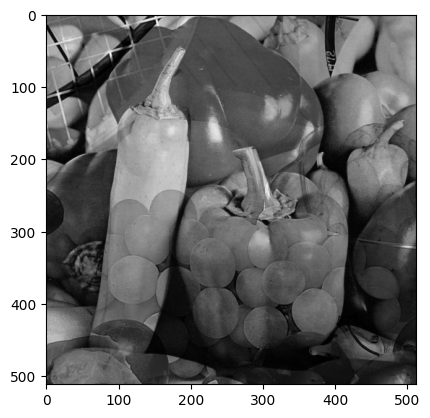

In [7]:
plt.imshow(exact, cmap="gray")

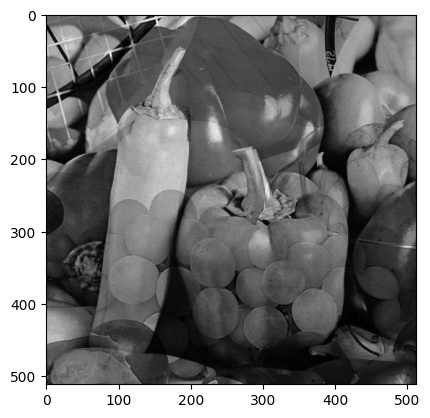

In [8]:
plt.imshow(approx_0, cmap="gray")

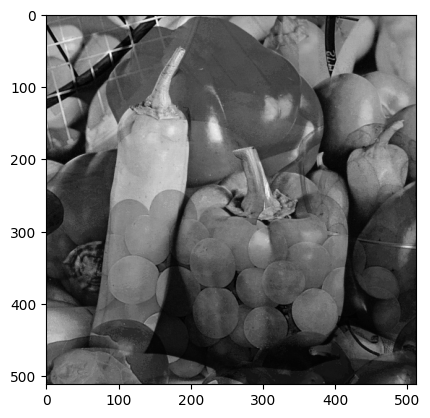

In [9]:
plt.imshow(approx_1, cmap="gray")

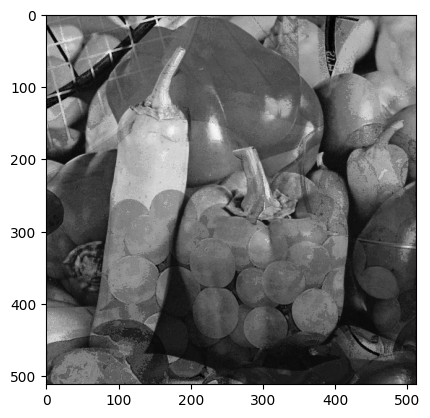

In [10]:
plt.imshow(approx_2, cmap="gray")